<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/1_Outliers_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.youtube.com/watch?v=ZKlJmdmmR28&t=831s ---> How to Detect Outliers in Machine Learning (KGP Talkie)

### **Where to Handle Outliers?**

Depending on the context, outliers either deserve special attention or should be completely ignored.

 - **Remove** in **Fuel monitoring**
 - **Keep** in **fraud detection** in **credit card** transaction

### **Why we Need to Handle it?**

- Machine Learning algorithms are sensitive to outliers. **Tree based models** generally **ignores outliers**

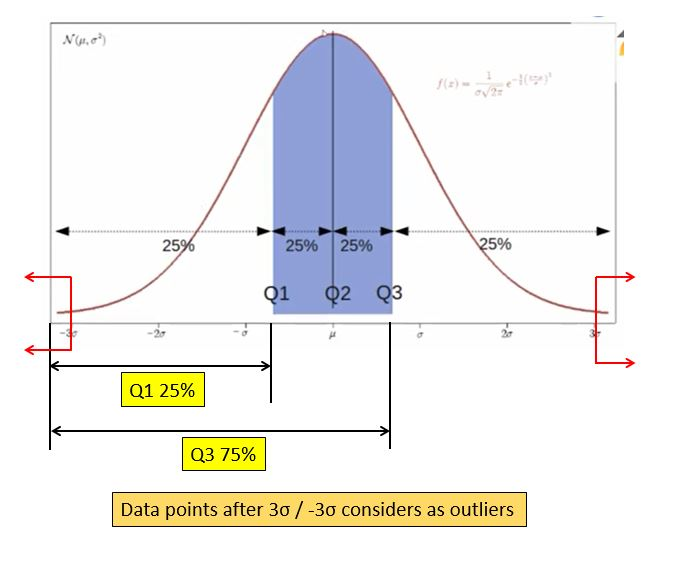

### **Extream value Analysis**

- Determine the statistical tails of the underlying distribution of the variable, and then find the values that sit at the very end of the tails.

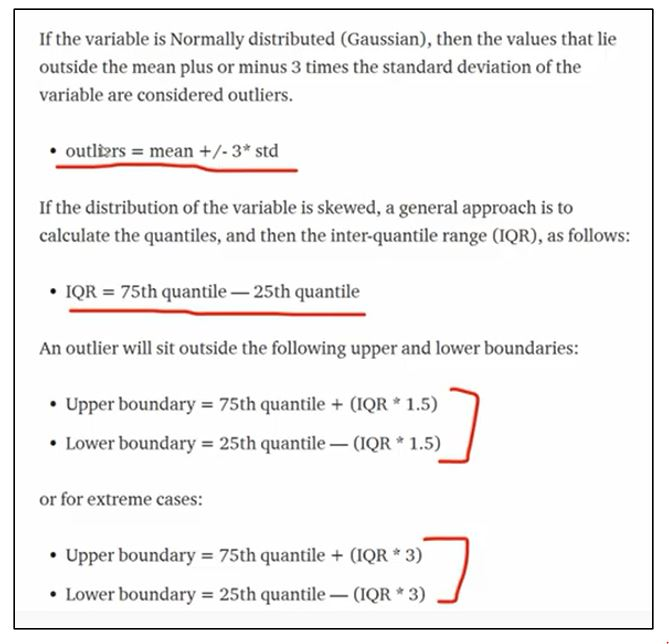

-----------------------

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

train = pd.read_csv('../input/cost-of-living/cost-of-living-2018.csv')
sns.boxplot(train['Cost of Living Index'])
plt.title("Box Plot before outlier removing")
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
    
drop_outliers(train, 'Cost of Living Index')
sns.boxplot(train['Cost of Living Index'])
plt.title("Box Plot after outlier removing")
plt.show()

https://medium.com/analytics-vidhya/outlier-detection-in-machine-learning-26e0bc7105cd

### What are outliers ?

- suppose we have a dataset consisting the distance between school and home of the students in km which is given as **5,6,7,8,9,10,6,7,100** here in this dataset **100** will behave like an outlier.

### Should we remove outliers or not ?

- Suppose atleast 30%( or a large amount) of datapoints are outliers means there is some interesting and meaningful insight in outliers and you should not remove it.

### Detection of outliers based on Distributions

i. Normally Distributed data :
- In case of normal distribution if datapoints lie away from the range (μ + 3σ) and (μ — 3 σ) is considered as outliers.

In [ ]:
# Plotting and observing whether dataset has outliers or not
plt.figure(figsize=(16, 4)) # figure size
plt.subplot(1, 3, 1) #multiple plot plottig and 1st position of fig
sns.distplot(df["RM"], bins=30) #checking is data normally dist ?
plt.title('Histogram') 
plt.subplot(1, 3, 2)  #plotting second position of figure
sns.boxplot(y=df["RM"]) #boxplot
plt.title('Boxplot')
plt.subplot(1, 3, 3) #plotting third position of figure
stats.probplot(df["RM"], dist="norm", plot=plt) #q-q plot to check #how our data is distributed in reference with normal distribution
plt.ylabel('RM quantiles')
plt.show()

### To find minimum and maximum boundary value

In [ ]:
# outlier boundary value for normally distributed dataset
def min_max_boundary(data,col):
    min_value=df[col].mean()-3*df[col].std()
    max_value=df[col].mean()+3*df[col].std()
    return min_value,max_value
min_max_boundary(df,"RM")

#### Any value more than 8.39 and less than 4.17 would be considered as outliers.

### Removing outliers :

In [ ]:
#filtering all the value mabove maximum boundary value and below #minimum  boundary value 
df=df[(df["RM"] >4.683568137432223) & (df["RM"] < 7.7636498112857)]

#plotting the df["RM"] after removing outliers
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1)  
sns.distplot(df["RM"], bins=30)  
plt.title('Histogram') 
plt.subplot(1, 3, 2)   
sns.boxplot(y=df["RM"]) 
plt.title('Boxplot')
plt.subplot(1, 3, 3) 
stats.probplot(df["RM"], dist="norm", plot=plt)
plt.ylabel('RM quantiles')
plt.show()

### ii. Skewed Distributed data :
- If value doesnot lie in between the range :- 25percentile- (1.5*IQR) & 75percentile+(1.5*IQR) then datpoint is considered as outliers.
- Here IQR= Q3-Q1

In [ ]:
#plotting different plot to analyse presence of outliers
plt.figure(figsize=(16, 4)) # figure size
plt.subplot(1, 3, 1) #multiple plot plottig and 1st position of figure
sns.distplot(df["LSTAT"], bins=30) #checking data is normally distributed or not
plt.title('Histogram',fontsize=20) 
plt.subplot(1, 3, 2)  #plotting second position of figure
sns.boxplot(y=df["LSTAT"]) #boxplot
plt.title('Boxplot',fontsize=20)
plt.subplot(1, 3, 3) #plotting third position of figure
stats.probplot(df["LSTAT"], dist="norm", plot=plt)#q-q plot to check how our data is distributed in reference with normal distribution
plt.title("Q-Q plot",fontsize=20)
plt.show()

### To find minimum and maximum boundary value

In [ ]:
# finding upper and lower boundary limit
def non_normal_outliers(data,col):
    IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
    lower_limit=data[col].quantile(0.75) + (1.5*IQR)
    upper_limit=data[col].quantile(0.25) - (1.5*IQR)
    return "lower limit of dataset : {0},  upper limit of dataset 
            {1}".format(lower_limit,upper_limit)
  non_normal_outliers(df,"LSTAT")


# we can write same code in another way to print minimum and maximum value in the form of list.
list1=[]
def outer_function(data,col):
    # Hidden from the outer code
    IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
    def max_value(data,col):
        max_=df[col].quantile(0.75) + (1.5*IQR)
        return max_
    list1.append(max_value(data,col))
    def min_value (data,col):
        min_=df[col].quantile(0.25) - (1.5*IQR)
        return min_ 
    list1.append(min_value(data,col))
#inner_increment(5)
outer_function(df,"LSTAT")
list1

### Removing outliers :

In [ ]:
# filtering values lie above and below min and max value
df=df.loc[(df["LSTAT"]<list1[0]) & (df["LSTAT"]>list1[1])]
--------------------------------------------------------------------
# plotting the dataset after eliminating outliers
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1)  
sns.distplot(df["LSTAT"], bins=30)  
plt.title('Histogram') 
plt.subplot(1, 3, 2)   
sns.boxplot(y=df["LSTAT"]) 
plt.title('Boxplot')
plt.subplot(1, 3, 3) 
stats.probplot(df["LSTAT"], dist="norm", plot=plt)
plt.ylabel('RM quantiles')
plt.show()

----------------------

- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

### **1) IQR**

In [ ]:
Q1=price_df.quantile(0.25)
Q3=price_df.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lowqe_bound,upper_bound)

In [ ]:
IQR_price = price_df[~((price_df < lowqe_bound) |(price_df > upper_bound)).any(axis=1)]
IQR_price.shape   #(24, 1)

------------------------

In [ ]:
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
print(boston_df_o1 < (Q1 - 1.5 * IQR)) | (boston_df_o1 > (Q3 + 1.5 * IQR))

### **2) Z Score**

- **outlier** if it has a **z-score less than -3 or greater than 3.**

- **Outliers = Observations with z-scores > 3 or < -3**

##### **a) Finding Z-score using Scipy**

In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
df = pd.DataFrame({'data':[-2,8,13,19,34,49,50,53,59,64,87,89,1456]})
df

,data
0,-2
1,8
2,13
3,19
4,34
5,49
6,50
7,53
8,59
9,64


In [ ]:
df['z_score'] = stats.zscore(df['data'])
df

,data,z_score
0,-2,-0.408710
1,8,-0.382211
2,13,-0.368961
3,19,-0.353061
4,34,-0.313311
5,49,-0.273561
6,50,-0.270911
7,53,-0.262961
8,59,-0.247061
9,64,-0.233811


In [ ]:
df.loc[df['z_score'].abs()<=3]

,data,z_score
0,-2,-0.408710
1,8,-0.382211
2,13,-0.368961
3,19,-0.353061
4,34,-0.313311
5,49,-0.273561
6,50,-0.270911
7,53,-0.262961
8,59,-0.247061
9,64,-0.233811


- In this case only **z score** which is above **3 is 1456**. so that clearly stands out as an **outlier**.

----------------------

In [ ]:
# We will use the Z-score function defined in scipy library to detect the outliers

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

In [ ]:
# It is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

threshold = 3
print(np.where(z > 3))

In [ ]:
# Remove Outliers

z_price=price_df[(z < 3).all(axis=1)]

In [ ]:
price_df.shape, z_price['price'].shape

---------------

In [ ]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

In [ ]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

In [ ]:
df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df4.shape

-------------------

### **Example 1**
**How to Remove Outliers in Python**

In [ ]:
import numpy as np
import pandas as pd 
import scipy.stats as stats

In [ ]:
# create dataframe with three columns 'A', 'B', 'C'
np.random.seed(10)
data = pd.DataFrame(np.random.randint(0, 10, size=(100, 3)), columns=['A', 'B', 'C'])

# view first 10 rows 
data[:10]

,A,B,C
0,9,4,0
1,1,9,0
2,1,8,9
3,0,8,6
4,4,3,0
5,4,6,8
6,1,8,4
7,1,3,6
8,5,3,9
9,6,9,1


##### **a) Z-score method:**

In [ ]:
# find absolute value of z-score for each observation
z = np.abs(stats.zscore(data))

# only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = data[(z<3).all(axis=1)]

# find how many rows are left in the dataframe 
data_clean.shape

(100, 3)

##### **b) Interquartile range method:**

In [ ]:
# find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

# only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

# find how many rows are left in the dataframe 
data_clean.shape

(100, 3)

--------------------